In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import graphviz
import pandas as pd

In [2]:
housing = fetch_california_housing()
X_train_full, X_test, y_train, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(housing.data, housing.target, random_state=42)

mlp_reg = MLPRegressor(hidden_layer_sizes=[50,50,50], random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)
rmse = mean_squared_error(y_valid, y_pred, squared=False)
rmse

c:\Users\travi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.5245109352606162

In [3]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris

iris = load_iris()
X_iris_full, X_iris_test, y_iris_train, y_iris_test = train_test_split(iris.data, iris.target, test_size=0.1, random_state=42)
X_iris_train, X_iris_valid, y_iris_train, y_iris_test = train_test_split(iris.data, iris.target, test_size=0.1, random_state=42)

mlp_clf = MLPClassifier(hidden_layer_sizes=[5], max_iter = 10_000,random_state=42)
pipeline_clf = make_pipeline(StandardScaler(), mlp_clf)
pipeline_clf.fit(X_iris_train, y_iris_train)
y_pred = pipeline_clf.predict(X_iris_test)
accuracy_score(y_iris_test, y_pred)

1.0

In [4]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [5]:
X_train, X_valid, X_test = X_train / 255.0, X_valid / 255.0, X_test / 255.0 # Scaling from 0-255 to 0-1

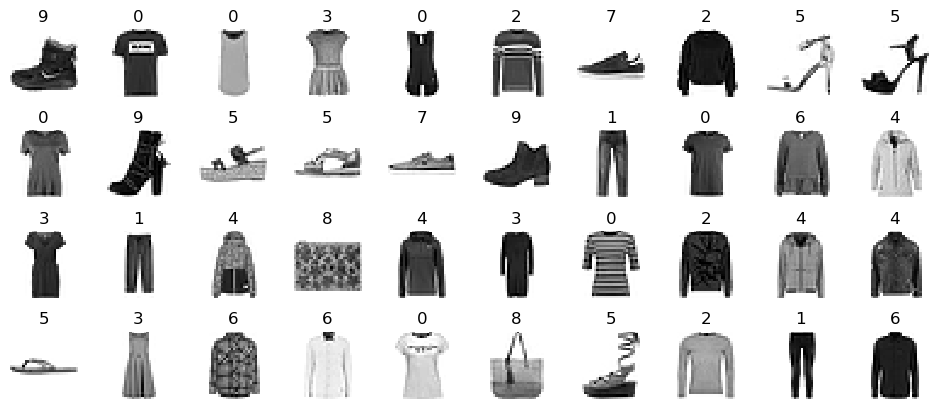

In [6]:
n_rows = 4 
n_cols = 10
plt.figure(figsize=(n_cols*1.2, n_rows*1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index])

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [7]:
class_names = ["T-shirt/top", "Pants", "Pullover", "Dress", "Jacket", "Sandal", "Shirt", "Sneaker","Bag", "Boot"]

In [8]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=(28,28)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


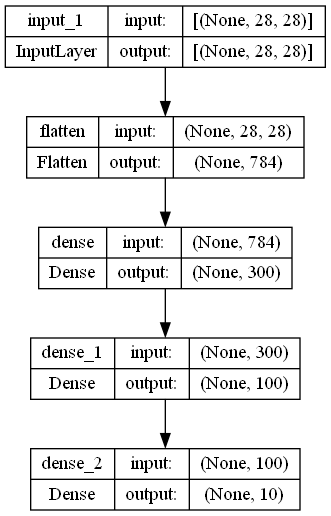

In [10]:
tf.keras.utils.plot_model(model)
tf.keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [11]:
model.layers

In [12]:
output_layer = model.get_layer('dense_2')
weights, biases = output_layer.get_weights()
weights

array([[-1.12283096e-01,  1.39976442e-01,  3.91305387e-02,
         1.96420699e-01,  1.38537735e-02,  2.31458902e-01,
         1.64774686e-01, -1.60609335e-01,  5.45828044e-02,
        -5.96021861e-02],
       [-4.25305218e-02,  1.60578102e-01,  1.30159706e-01,
        -9.54962373e-02,  1.19035095e-01, -2.02155232e-01,
        -1.95495993e-01, -1.26010180e-02, -2.10928127e-01,
         8.03931653e-02],
       [ 1.01531625e-01, -2.17569053e-01, -7.71936029e-02,
        -2.70746052e-02,  5.84181547e-02, -7.05704987e-02,
         2.33075440e-01, -1.13011867e-01,  1.85552925e-01,
        -1.65863335e-02],
       [-6.17948025e-02,  3.46836746e-02,  6.73731565e-02,
         1.56454206e-01, -1.66650951e-01,  1.67953938e-01,
         1.84638202e-01, -2.03083843e-01,  2.33465314e-01,
         1.51620060e-01],
       [ 3.03583741e-02, -2.49919593e-02,  2.13332742e-01,
        -1.68285251e-01, -2.87844986e-02, -7.30692446e-02,
         3.62922847e-02,  1.16214573e-01,  7.98414648e-02,
         7.

In [13]:
print(weights.shape)
print(biases.shape)

(100, 10)
(10,)


In [14]:
hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()
print(weights.shape)
print(biases.shape)

(784, 300)
(300,)


In [15]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer="sgd",
              metrics=["accuracy"])

In [16]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7258 - accuracy: 0.7617 - val_loss: 0.5093 - val_accuracy: 0.8274
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4918 - accuracy: 0.8298 - val_loss: 0.4707 - val_accuracy: 0.8278
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4451 - accuracy: 0.8434 - val_loss: 0.4314 - val_accuracy: 0.8490
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4197 - accuracy: 0.8536 - val_loss: 0.4014 - val_accuracy: 0.8570
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3974 - accuracy: 0.8606 - val_loss: 0.3971 - val_accuracy: 0.8576
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3805 - accuracy: 0.8656 - val_loss: 0.3960 - val_accuracy: 0.8594
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3675 - accuracy: 0.8695 - val_loss: 0.3732 - val_accuracy:

In [17]:
print(history.params)
print(history.epoch)
pd.DataFrame(history.history).head(2)

{'verbose': 1, 'epochs': 30, 'steps': 1719}
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


,loss,accuracy,val_loss,val_accuracy
0,0.725757,0.761745,0.509339,0.8274
1,0.491822,0.829782,0.470736,0.8278


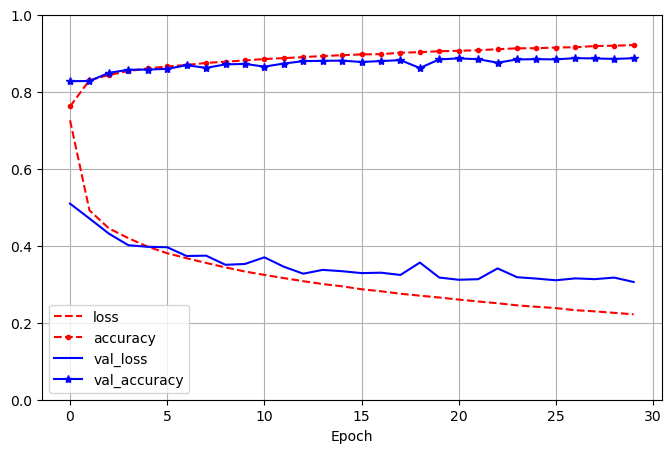

In [18]:
pd.DataFrame(history.history).plot(figsize=(8, 5), ylim=[0,1], grid=True, xlabel="Epoch", style=['r--', 'r--.', 'b-','b-*'])
plt.show()

In [19]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 728us/step - loss: 0.3236 - accuracy: 0.8863


[0.32355406880378723, 0.8863000273704529]

In [20]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 43ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.98],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

prediction:  ['Boot', 'Pullover', 'Pants']


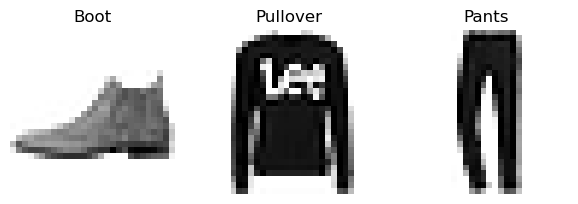

In [21]:
plt.figure(figsize=(7.2, 2.4))
y_pred = y_proba.argmax(axis=-1)
print("prediction: ", [class_names[y] for y in y_pred])
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [22]:
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss='mse', optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test, rmse_test = model.evaluate(X_test, y_test)
print(f'Mse_test erorr: {mse_test}\nRmse_test error: {rmse_test}')
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
1719/1719 [==============================] - 3s 2ms/step - loss: 8.6296 - root_mean_squared_error: 2.9376 - val_loss: 8.4223 - val_root_mean_squared_error: 2.9023
Epoch 2/20
1719/1719 [==============================] - 4s 2ms/step - loss: 8.3067 - root_mean_squared_error: 2.8821 - val_loss: 8.3945 - val_root_mean_squared_error: 2.8975
Epoch 3/20
1719/1719 [==============================] - 4s 2ms/step - loss: 8.2888 - root_mean_squared_error: 2.8790 - val_loss: 8.4065 - val_root_mean_squared_error: 2.8996
Epoch 4/20
1719/1719 [==============================] - 4s 2ms/step - loss: 8.2821 - root_mean_squared_error: 2.8779 - val_loss: 8.4613 - val_root_mean_squared_error: 2.9089
Epoch 5/20
1719/1719 [==============================] - 4s 2ms/step - loss: 8.2747 - root_mean_squared_error: 2.8766 - val_loss: 8.3922 - val_root_mean_squared_error: 2.8972
Epoch 6/20
1719/1719 [==============================] - 4s 2ms/step - loss: 8.2640 - root_mean_squared_error: 2.8747 - val_loss: 8

In [23]:
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

In [24]:
normalizating_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30, activation="relu")
hidden_layer2 = tf.keras.layers.Dense(30, activation='relu')
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
normalized = normalizating_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized, hidden2])
output = output_layer(concat)

model = tf.keras.Model(inputs=[input_], outputs=[output])

In [25]:
model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), metrics=["RootMeanSquaredError"])
normalizating_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid,y_valid))
mse_test, rmse_test = model.evaluate(X_test, y_test)
print(f'Mse_test erorr: {mse_test}\nRmse_test error: {rmse_test}')
X_new = X_test[:3]
y_pred = model.predict(X_new)
y_pred

Epoch 1/30
363/363 [==============================] - 1s 771us/step - loss: 1.0637 - root_mean_squared_error: 1.0313 - val_loss: 0.5367 - val_root_mean_squared_error: 0.7326
Epoch 2/30
363/363 [==============================] - 0s 585us/step - loss: 0.4384 - root_mean_squared_error: 0.6621 - val_loss: 0.4747 - val_root_mean_squared_error: 0.6890
Epoch 3/30
363/363 [==============================] - 0s 612us/step - loss: 0.3980 - root_mean_squared_error: 0.6309 - val_loss: 0.4608 - val_root_mean_squared_error: 0.6789
Epoch 4/30
363/363 [==============================] - 0s 597us/step - loss: 0.3728 - root_mean_squared_error: 0.6106 - val_loss: 0.3799 - val_root_mean_squared_error: 0.6164
Epoch 5/30
363/363 [==============================] - 0s 625us/step - loss: 0.3617 - root_mean_squared_error: 0.6014 - val_loss: 0.3472 - val_root_mean_squared_error: 0.5892
Epoch 6/30
363/363 [==============================] - 0s 587us/step - loss: 0.3532 - root_mean_squared_error: 0.5943 - val_loss: 0

array([[0.35791224],
       [1.2039173 ],
       [4.7528706 ]], dtype=float32)

In [26]:
#input layer
input_wide =tf.keras.layers.Input(shape=[5])
input_deep = tf.keras.layers.Input(shape=[6])
#normalization layer
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
#rest of the deep layers for input_deep
hidden1 = tf.keras.layers.Dense(30, activation='relu')(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation='relu')(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
#Output layer w/ concat on wide and deep layer
output = tf.keras.layers.Dense(1)(concat)

model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])

In [27]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [28]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=['RootMeanSquaredError'])

X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]
X_new_wide, X_new_deep = X_train_wide[:3], X_train_deep[:3]

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)

history = model.fit((X_train_wide, X_train_deep), y_train, epochs=20, validation_data=((X_valid_wide, X_valid_deep), y_valid))
mse_test = model.evaluate((X_test_wide, X_test_deep), y_test)
y_pred = model.predict((X_new_wide, X_new_deep))
print(f'mse_test: {mse_test}')
y_pred

Epoch 1/20
363/363 [==============================] - 1s 817us/step - loss: 1.3727 - root_mean_squared_error: 1.1716 - val_loss: 1.5361 - val_root_mean_squared_error: 1.2394
Epoch 2/20
363/363 [==============================] - 0s 598us/step - loss: 0.4928 - root_mean_squared_error: 0.7020 - val_loss: 1.2885 - val_root_mean_squared_error: 1.1351
Epoch 3/20
363/363 [==============================] - 0s 592us/step - loss: 0.4287 - root_mean_squared_error: 0.6548 - val_loss: 0.5149 - val_root_mean_squared_error: 0.7175
Epoch 4/20
363/363 [==============================] - 0s 592us/step - loss: 0.4017 - root_mean_squared_error: 0.6338 - val_loss: 0.4750 - val_root_mean_squared_error: 0.6892
Epoch 5/20
363/363 [==============================] - 0s 592us/step - loss: 0.3879 - root_mean_squared_error: 0.6228 - val_loss: 0.4061 - val_root_mean_squared_error: 0.6373
Epoch 6/20
363/363 [==============================] - 0s 605us/step - loss: 0.3745 - root_mean_squared_error: 0.6120 - val_loss: 0

array([[3.0204155],
       [1.882897 ],
       [2.5334501]], dtype=float32)

In [29]:
input_wide = tf.keras.layers.Input(shape=[5])  # features 0 to 4
input_deep = tf.keras.layers.Input(shape=[6])  # features 2 to 7
norm_layer_wide = tf.keras.layers.Normalization()

norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)

hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
#Using multiple outputs in 1 layer
output = tf.keras.layers.Dense(1)(concat)
output_aux = tf.keras.layers.Dense(1)(hidden2)

model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output, output_aux])

In [30]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=("mse", "mse"), loss_weights=(0.9,0.1), optimizer=optimizer, metrics=['RootMeanSquaredError'])

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=20, 
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid))
)

eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
weighted_sum_of_losses, main_loss, aux_loss, main_rmse, aux_rmse = eval_results
print(f'weight sum of losses: {weighted_sum_of_losses}\nmain_loss: {main_loss}, aux_loss: {aux_loss}\nmain_rmse: {main_rmse}, aux_rmse:{aux_rmse}')        

Epoch 1/20
363/363 [==============================] - 1s 970us/step - loss: 1.6342 - dense_2_loss: 1.5426 - dense_3_loss: 2.4583 - dense_2_root_mean_squared_error: 1.2420 - dense_3_root_mean_squared_error: 1.5679 - val_loss: 0.8197 - val_dense_2_loss: 0.7310 - val_dense_3_loss: 1.6182 - val_dense_2_root_mean_squared_error: 0.8550 - val_dense_3_root_mean_squared_error: 1.2721
Epoch 2/20
363/363 [==============================] - 0s 699us/step - loss: 0.5540 - dense_2_loss: 0.5128 - dense_3_loss: 0.9252 - dense_2_root_mean_squared_error: 0.7161 - dense_3_root_mean_squared_error: 0.9619 - val_loss: 0.6134 - val_dense_2_loss: 0.5704 - val_dense_3_loss: 1.0004 - val_dense_2_root_mean_squared_error: 0.7553 - val_dense_3_root_mean_squared_error: 1.0002
Epoch 3/20
363/363 [==============================] - 0s 707us/step - loss: 0.4576 - dense_2_loss: 0.4328 - dense_3_loss: 0.6808 - dense_2_root_mean_squared_error: 0.6579 - dense_3_root_mean_squared_error: 0.8251 - val_loss: 0.4855 - val_dense_

In [31]:
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))
print(f'main guesses: {[x[0] for x in y_pred_main]}')
print(f'aux guesses: {[x_aux[0] for x_aux in y_pred_aux]}')
print(f'actual: {[y for y in y_train[:3]]}')

1/1 [==============================] - 0s 33ms/step
main guesses: [3.130703, 1.6805661, 2.5202262]
aux guesses: [2.8813324, 1.6434621, 2.7712953]
actual: [1.442, 1.687, 1.621]


In [32]:
y_pred_tuple = model.predict((X_new_wide, X_new_deep))
y_pred = dict(zip(model.output_names, y_pred_tuple))
y_pred

1/1 [==============================] - 0s 10ms/step


{'dense_2': array([[3.130703 ],
        [1.6805661],
        [2.5202262]], dtype=float32),
 'dense_3': array([[2.8813324],
        [1.6434621],
        [2.7712953]], dtype=float32)}

In [33]:
class WideAndDeepModel(tf.keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.norm_layer_wide = tf.keras.layers.Normalization()
        self.norm_layer_deep = tf.keras.layers.Normalization()
        self.hidden1 = tf.keras.layers.Dense(units, activation=activation)
        self.hidden2 = tf.keras.layers.Dense(units, activation=activation)
        self.main_output = tf.keras.layers.Dense(1)
        self.aux_output = tf.keras.layers.Dense(1)
    
    def call(self, inputs):
        input_wide, input_deep = inputs
        norm_wide = self.norm_layer_wide(input_wide)
        norm_deep = self.norm_layer_deep(input_deep)
        hidden1 = self.hidden1(norm_deep)
        hidden2 = self.hidden2(hidden1)
        concat = tf.keras.layers.concatenate([norm_wide, hidden2])
        output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return output, aux_output

model = WideAndDeepModel(30, activation='relu', name="Subclass_model") 

In [34]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=optimizer,
              metrics=["RootMeanSquaredError"])
model.norm_layer_wide.adapt(X_train_wide)
model.norm_layer_deep.adapt(X_train_deep)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)))
eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
weighted_sum_of_losses, main_loss, aux_loss, main_rmse, aux_rmse = eval_results
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))


Epoch 1/10
363/363 [==============================] - 1s 991us/step - loss: 1.8165 - output_1_loss: 1.7668 - output_2_loss: 2.2637 - output_1_root_mean_squared_error: 1.3292 - output_2_root_mean_squared_error: 1.5046 - val_loss: 1.1080 - val_output_1_loss: 0.7868 - val_output_2_loss: 3.9981 - val_output_1_root_mean_squared_error: 0.8870 - val_output_2_root_mean_squared_error: 1.9995
Epoch 2/10
363/363 [==============================] - 0s 703us/step - loss: 0.6224 - output_1_loss: 0.6056 - output_2_loss: 0.7743 - output_1_root_mean_squared_error: 0.7782 - output_2_root_mean_squared_error: 0.8799 - val_loss: 0.8142 - val_output_1_loss: 0.7046 - val_output_2_loss: 1.8004 - val_output_1_root_mean_squared_error: 0.8394 - val_output_2_root_mean_squared_error: 1.3418
Epoch 3/10
363/363 [==============================] - 0s 698us/step - loss: 0.5119 - output_1_loss: 0.5008 - output_2_loss: 0.6115 - output_1_root_mean_squared_error: 0.7077 - output_2_root_mean_squared_error: 0.7820 - val_loss:

In [35]:
print(f'weight sum of losses: {weighted_sum_of_losses}\nmain_loss: {main_loss}, aux_loss: {aux_loss}\nmain_rmse: {main_rmse}, aux_rmse:{aux_rmse}')  
print(f'main guesses: {[x[0] for x in y_pred_main]}')
print(f'aux guesses: {[x_aux[0] for x_aux in y_pred_aux]}')
print(f'actual: {[y for y in y_train[:3]]}')

weight sum of losses: 0.3595786392688751
main_loss: 0.3525620698928833, aux_loss: 0.42272862792015076
main_rmse: 0.593769371509552, aux_rmse:0.6501758694648743
main guesses: [3.1304588, 1.9164273, 2.0910876]
aux guesses: [2.947241, 1.8845564, 2.2435596]
actual: [1.442, 1.687, 1.621]


In [36]:
model.save("First_Keras_model", save_format="tf")

INFO:tensorflow:Assets written to: First_Keras_model\assets


INFO:tensorflow:Assets written to: First_Keras_model\assets


In [37]:
model = tf.keras.models.load_model("First_Keras_model")
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))  
print(f'main guesses: {[y[0] for y in y_pred_main]}')
print(f'aux guesses: {[y_aux[0] for y_aux in y_pred_aux]}')

1/1 [==============================] - 0s 36ms/step
main guesses: [3.1304586, 1.9164273, 2.0910876]
aux guesses: [2.947241, 1.8845564, 2.2435596]


In [38]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("My_checkpoint", save_weights_only=True)
histor = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)), callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 0.3647 - output_1_loss: 0.3578 - output_2_loss: 0.4274 - output_1_root_mean_squared_error: 0.5981 - output_2_root_mean_squared_error: 0.6537 - val_loss: 0.3598 - val_output_1_loss: 0.3492 - val_output_2_loss: 0.4554 - val_output_1_root_mean_squared_error: 0.5909 - val_output_2_root_mean_squared_error: 0.6748
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3535 - output_1_loss: 0.3466 - output_2_loss: 0.4156 - output_1_root_mean_squared_error: 0.5887 - output_2_root_mean_squared_error: 0.6447 - val_loss: 0.5079 - val_output_1_loss: 0.4894 - val_output_2_loss: 0.6745 - val_output_1_root_mean_squared_error: 0.6996 - val_output_2_root_mean_squared_error: 0.8213
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3519 - output_1_loss: 0.3456 - output_2_loss: 0.4082 - output_1_root_mean_squared_error: 0.5879 - output_2_root_mean_squared_error: 0.6389 - val_loss: 0.343

In [43]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=20,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)), callbacks=[checkpoint_cb, early_stopping_cb]
)

Epoch 1/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3288 - output_1_loss: 0.3232 - output_2_loss: 0.3787 - output_1_root_mean_squared_error: 0.5685 - output_2_root_mean_squared_error: 0.6154 - val_loss: 0.5775 - val_output_1_loss: 0.5660 - val_output_2_loss: 0.6808 - val_output_1_root_mean_squared_error: 0.7523 - val_output_2_root_mean_squared_error: 0.8251
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3304 - output_1_loss: 0.3249 - output_2_loss: 0.3796 - output_1_root_mean_squared_error: 0.5700 - output_2_root_mean_squared_error: 0.6161 - val_loss: 0.3257 - val_output_1_loss: 0.3140 - val_output_2_loss: 0.4309 - val_output_1_root_mean_squared_error: 0.5603 - val_output_2_root_mean_squared_error: 0.6565
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3301 - output_1_loss: 0.3250 - output_2_loss: 0.3762 - output_1_root_mean_squared_error: 0.5701 - output_2_root_mean_squared_error: 0.6133 - val_loss: 0.676

In [48]:
class PrintValTrainRatioCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        ratio = logs["val_loss"]/ logs["loss"]
        print(f"\nEpoch={epoch}, val/train={ratio:.2f}")

In [49]:
history = model.fit((X_train_wide, X_train_deep), (y_train, y_train), epochs=20,
          validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)), callbacks=[early_stopping_cb, PrintValTrainRatioCallback()])

Epoch 1/20
350/363 [===========================>..] - ETA: 0s - loss: 0.3022 - output_1_loss: 0.2972 - output_2_loss: 0.3466 - output_1_root_mean_squared_error: 0.5452 - output_2_root_mean_squared_error: 0.5888
Epoch=0, val/train=1.19
363/363 [==============================] - 0s 798us/step - loss: 0.3034 - output_1_loss: 0.2985 - output_2_loss: 0.3476 - output_1_root_mean_squared_error: 0.5464 - output_2_root_mean_squared_error: 0.5896 - val_loss: 0.3625 - val_output_1_loss: 0.3525 - val_output_2_loss: 0.4522 - val_output_1_root_mean_squared_error: 0.5937 - val_output_2_root_mean_squared_error: 0.6725
Epoch 2/20
348/363 [===========================>..] - ETA: 0s - loss: 0.3134 - output_1_loss: 0.3084 - output_2_loss: 0.3581 - output_1_root_mean_squared_error: 0.5553 - output_2_root_mean_squared_error: 0.5984
Epoch=1, val/train=1.24
363/363 [==============================] - 0s 757us/step - loss: 0.3112 - output_1_loss: 0.3062 - output_2_loss: 0.3562 - output_1_root_mean_squared_error:

In [76]:
from pathlib import Path
from time import strftime

def get_run_logdir(root_logdir="my_logs"):
    return Path(root_logdir) / strftime("run_%Y_%m_%d_%H_%M_%S")

run_logdir = get_run_logdir()

In [78]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)

In [79]:
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir,
                                                profile_batch=(100,200))
model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid),
          callbacks=tensorboard_cb)

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 2.3210 - root_mean_squared_error: 1.5235 - val_loss: 1.5904 - val_root_mean_squared_error: 1.2611
Epoch 2/20
363/363 [==============================] - 0s 780us/step - loss: 0.8078 - root_mean_squared_error: 0.8988 - val_loss: 0.8821 - val_root_mean_squared_error: 0.9392
Epoch 3/20
363/363 [==============================] - 0s 807us/step - loss: 0.6579 - root_mean_squared_error: 0.8111 - val_loss: 0.8816 - val_root_mean_squared_error: 0.9389
Epoch 4/20
363/363 [==============================] - 0s 819us/step - loss: 0.6091 - root_mean_squared_error: 0.7804 - val_loss: 0.6505 - val_root_mean_squared_error: 0.8066
Epoch 5/20
363/363 [==============================] - 0s 833us/step - loss: 0.5726 - root_mean_squared_error: 0.7567 - val_loss: 0.5606 - val_root_mean_squared_error: 0.7487
Epoch 6/20
363/363 [==============================] - 0s 850us/step - loss: 0.5431 - root_mean_squared_error: 0.7369 - val_loss: 0.5

In [83]:
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(str(test_logdir))
with writer.as_default():
    for step in range(1, 1000+1):
        tf.summary.scalar("my_scalar", np.sin(step/10), step=step)
        
        data = (np.random.randn(100) + 2) * step/100
        tf.summary.histogram("my_hist", data, buckets=50, step=step)
        
        images = np.random.rand(2, 32, 32, 3) * step/1000
        tf.summary.image("my_images", images, step=step)
        
        texts = ["The step is " + str(step), "Its square is " + str(step ** 2)]
        tf.summary.text("my_text", texts, step=step)
        
        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio("my_audio", audio, sample_rate=48000, step=step)
        
